In [4]:
import os
os.chdir('/home/jovyan/work')
import init
import reading
import do_calibration
import aavso
import numpy as np
import pandas as pd
from do_muniwin import write_munifind_single
from do_muniwin import getBestComparisonStars
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import re

comparison_stars = []
with open(init.basedir + 'munifind.txt', 'r') as fp:
    for i, line in enumerate(fp):
        if i == 1:
            print(line)# 26th line
            m = re.search('Reference star:\s*(\d+),', line)            
            comparison_stars.append(int(m.group(1)))
            break
print(comparison_stars)

Reference star: 58, Aperture: 2

[58]


In [6]:
ref_index = do_calibration.find_reference_frame_index()
print('reference index is', ref_index)
match_file = 'match000???.pht'
aperture_range = np.arange(0.2, 10, 0.2)
results = []
for aperture in aperture_range:
    print('aperture:', aperture)
    write_munifind_single(match_file, aperture)
    result = getBestComparisonStars(10000)
    results.append(result)

reference index is 0
aperture: 0.2
write munifind
max goodpoints: 890
min stdev: 0.00567
     STAR  MEAN_MAG    STDEV  GOODPOINTS
4       5  -1.48791  0.00567         890
23     27  -0.50590  0.00682         887
151   166   0.99068  0.00687         888
47     53  -0.16301  0.00759         882
161   179   1.04110  0.00827         862
Comparison stars:        STAR  MEAN_MAG    STDEV  GOODPOINTS
4        5  -1.48791  0.00567         890
23      27  -0.50590  0.00682         887
151    166   0.99068  0.00687         888
47      53  -0.16301  0.00759         882
338    389   1.73004  0.00833         888
68      76   0.23771  0.00840         889
85      92   0.40421  0.00858         887
99     108   0.52602  0.00868         887
150    169   0.98854  0.00898         887
91      99   0.45984  0.00929         889
220    249   1.30560  0.01001         886
350    399   1.76073  0.01009         889
335    388   1.72168  0.01022         887
269    310   1.51383  0.01023         886
201    226   1.2

First star: 5, second star: 27
[ 0.02356749  0.02356749  0.02356749  0.02356749  0.02668188  0.02668188
  0.02668188  0.02668188  0.02668188  0.02356749  0.02356749  0.02356749
  0.02356749  0.02356749  0.02162426  0.02162426  0.02162426  0.02162426
  0.02162426  0.0237682   0.0237682   0.0237682   0.0237682   0.0237682
  0.02972807  0.02972807  0.02972807  0.02972807  0.02972807  0.0353683
  0.0353683   0.0353683   0.0353683   0.0353683   0.04558971  0.04558971
  0.04558971  0.04558971  0.04558971  0.05560596  0.05560596  0.05560596
  0.05560596  0.05560596  0.05548062  0.05548062  0.05548062  0.05548062
  0.05548062]
Optimal aperture: 3.0


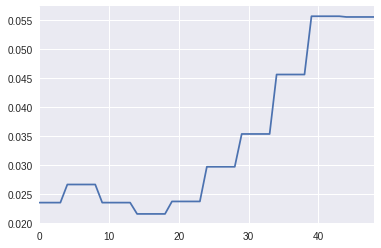

In [27]:
first_star = results[0]['STAR'].iloc[0]
second_star = results[0]['STAR'].iloc[1]
print("First star: {}, second star: {}".format(first_star, second_star))
diff_result_array = []
for df in results:
    first_stdev = df.loc[df['STAR'] == first_star]['MEAN_MAG']
    second_stdev = df.loc[df['STAR'] == second_star]['MEAN_MAG']
    #print("first: {},\n second: {}, {}".format(first_stdev, second_stdev, type(first_stdev)))
    diff_result = second_stdev.values - first_stdev.values
    sum_stdev = df['STDEV'].mean()
    #print(diff_result)
    #if(len(diff_result) == 1):
    diff_result_array = np.append(diff_result_array, sum_stdev)
print(diff_result_array)
%matplotlib inline
pd.Series(diff_result_array).plot()
print('Optimal aperture:',np.arange(0.2, 10, 0.2)[pd.Series(diff_result_array).idxmin()])
